In [3]:
import pandas as pd
import yfinance as yf
from datetime import date , timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [4]:
start_date = '2023-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-1  End Date: 2024-12-1


In [9]:
ticker = 'TSLA'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-01 to 2024-11-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  251 non-null    float64
 1   (Close, TSLA)      251 non-null    float64
 2   (High, TSLA)       251 non-null    float64
 3   (Low, TSLA)        251 non-null    float64
 4   (Open, TSLA)       251 non-null    float64
 5   (Volume, TSLA)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
df.isnull().sum()

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [12]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

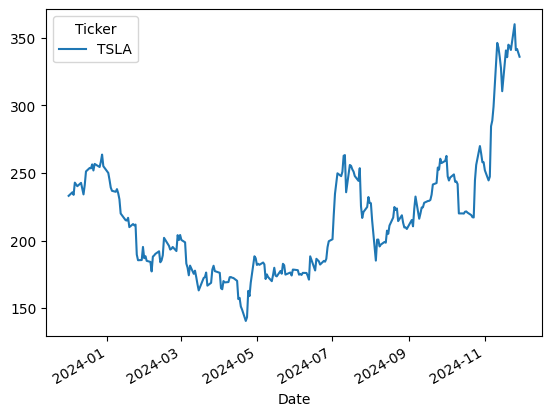

In [13]:
df['Open'].plot()

<Axes: xlabel='Date'>

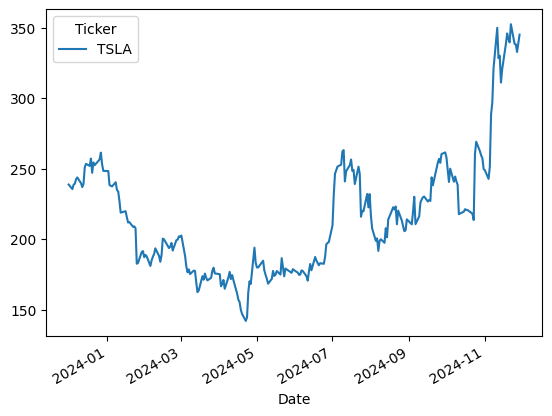

In [14]:
df['Close'].plot()

In [15]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000
2023-12-08,243.839996,243.839996,245.270004,239.270004,240.270004,102980100,239.829999
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.817143
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,239.466249


<Axes: xlabel='Date'>

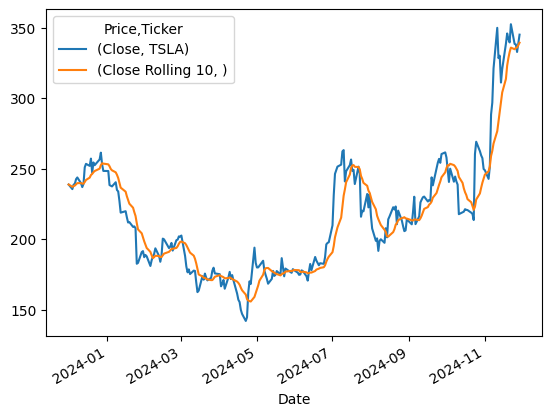

In [16]:
df[['Close','Close Rolling 10']].plot()

In [17]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [18]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000


<Axes: xlabel='Date'>

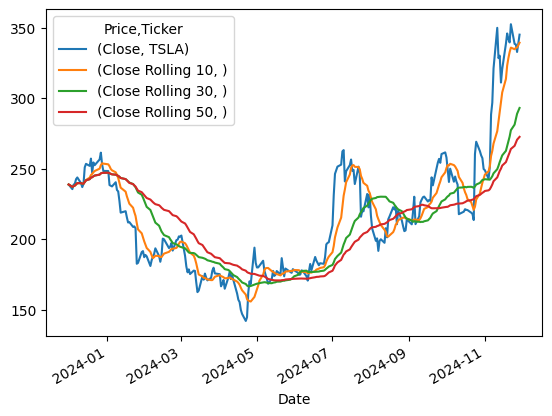

In [19]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [20]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597


<Axes: xlabel='Date'>

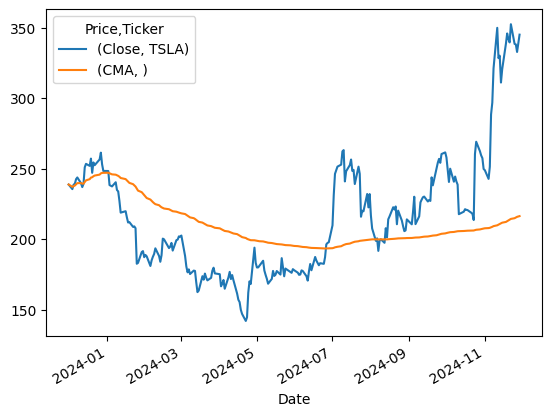

In [177]:
df[['Close','CMA']].plot()

In [21]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [179]:
adf_test(df['Close'])

ADF Statistics: -0.21546653898451537
p- value: 0.9366527608531471
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [180]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,,
2023-12-01,0,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN
2023-12-04,0,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000
2023-12-05,0,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999
2023-12-06,0,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994
2023-12-07,0,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004


In [1]:
adf_test(df['First Difference'].dropna())

NameError: name 'adf_test' is not defined

<Axes: xlabel='Date'>

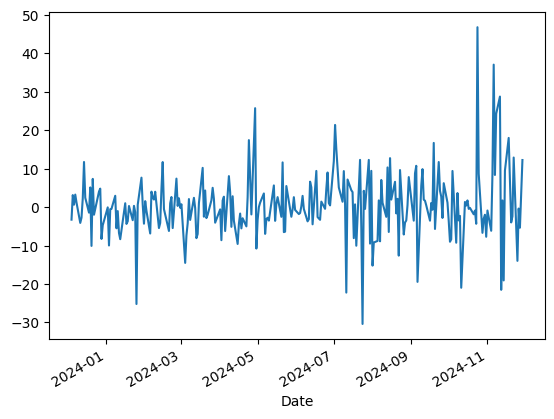

In [182]:
df['First Difference'].dropna().plot()

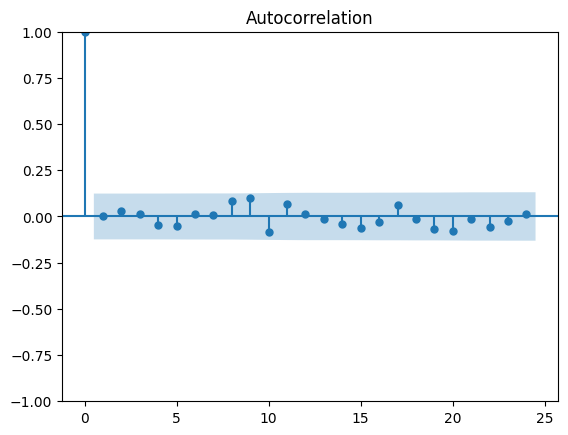

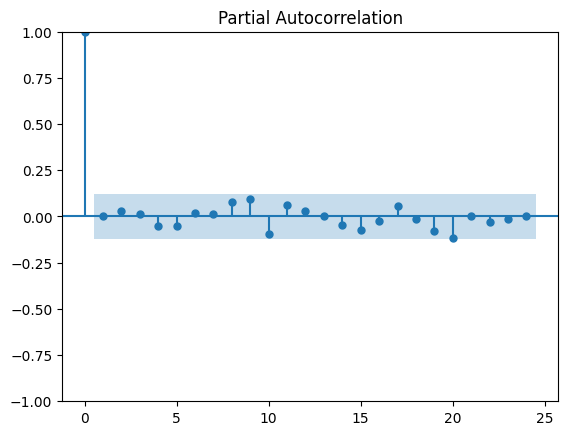

In [183]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [190]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1791.632, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1793.629, Time=0.06 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1793.630, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1790.237, Time=0.01 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1795.601, Time=0.57 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.920 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                        SARIMAX   Log Likelihood                -894.118
Date:                Mon, 16 Dec 2024   AIC                           1790.237
Time:                        11:48:52   BIC                           1793.758
Sample:                             0   HQIC                          1791.654
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.8189      3.503     21.358      0.000      67.953      81.685
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               305.60
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_ARIMA=ARIMA(df['Close'],order=(20,1,12))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax

In [36]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  251
Model:               ARIMA(20, 1, 12)   Log Likelihood                -876.373
Date:                Mon, 16 Dec 2024   AIC                           1818.746
Time:                        13:45:44   BIC                           1934.954
Sample:                             0   HQIC                          1865.517
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0426      3.073     -0.014      0.989      -6.066       5.981
ar.L2          0.1277      1.763      0.072      0.942      -3.327       3.582
ar.L3         -0.1804      0.693     -0.260      0.795      -1.539       1.178
ar.L4         -0.2515      0.169     -1.486      0.137      -0.583       0.080
ar.L5         -0.2566      0.726     -0.353      0.724      -1.680       1.167
ar.L6          0.0302      0.404      0.075      0.940      -0.761       0.822
ar.L7         -0.0331      0.343     -0.097      0.923      -0.705       0.639
ar.L8         -0.0592      0.327     -0.181      0.856      -0.700       0.582
ar.L9         -0.3238      0.116     -2.783      0.005      -0.552      -0.096
ar.L10         0.2475      0.971      0.255      0.799      -1.655       2.150
ar.L11        -0.2565      1.357     -0.189      0.850      -2.916       2.403
ar.L12        -0.3753      1.612     -0.233      0.816      -3.535       2.784
ar.L13         0.0446      0.173      0.257      0.797      -0.295       0.384
ar.L14         0.0121      0.230      0.053      0.958      -0.439       0.464
ar.L15        -0.0466      0.127     -0.366      0.714      -0.296       0.203
ar.L16         0.0189      0.119      0.159      0.874      -0.214       0.252
ar.L17         0.0997      0.147      0.678      0.498      -0.189       0.388
ar.L18         0.0270      0.233      0.116      0.908      -0.430       0.484
ar.L19        -0.1005      0.111     -0.905      0.365      -0.318       0.117
ar.L20        -0.0314      0.312     -0.101      0.920      -0.644       0.581
ma.L1          0.0150      3.297      0.005      0.996      -6.446       6.476
ma.L2         -0.1067      1.933     -0.055      0.956      -3.895       3.681
ma.L3          0.2015      0.955      0.211      0.833      -1.671       2.074
ma.L4          0.2053      0.342      0.601      0.548      -0.465       0.875
ma.L5          0.1844      0.683      0.270      0.787      -1.154       1.523
ma.L6          0.0003      0.259      0.001      0.999      -0.508       0.508
ma.L7          0.0960      0.477      0.201      0.840      -0.839       1.031
ma.L8          0.1603      0.746      0.215      0.830      -1.301       1.622
ma.L9          0.4588      0.784      0.585      0.558      -1.077       1.995
ma.L10        -0.3272      1.253     -0.261      0.794      -2.782       2.128
ma.L11         0.4881      2.062      0.237      0.813      -3.553       4.529
ma.L12         0.5253      2.564      0.205      0.838      -4.500       5.550
sigma2        63.1380     58.790      1.074      0.283     -52.089     178.365
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               404.55
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:       

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


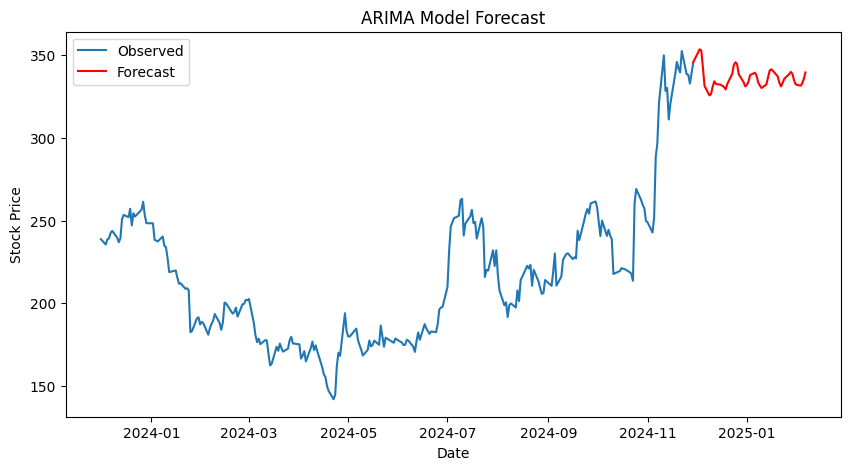

In [37]:
forecast_steps = 50
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()